In [65]:
import pandas as pd
import re

In [66]:
df = pd.read_csv('listings_cleaned.csv')
top_10_prices = df.sort_values(by='price', ascending=False).head(10)
top_10_prices

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,baths
2468,36027557,"Dupont Circle, Connecticut Avenue/K Street",38.90481,-77.04759,Private room,10000.0,31,152,10,365,0,4.68,1.0,1.0
2472,36028730,"Dupont Circle, Connecticut Avenue/K Street",38.90481,-77.04759,Private room,10000.0,31,1,10,365,0,unknown,1,5
2471,36028494,"Dupont Circle, Connecticut Avenue/K Street",38.90481,-77.04759,Private room,10000.0,31,9,10,365,0,4.33,1.0,1.0
2470,36028001,"Dupont Circle, Connecticut Avenue/K Street",38.90481,-77.04759,Private room,10000.0,31,13,10,365,0,4.54,1.0,1.0
2469,36027693,"Dupont Circle, Connecticut Avenue/K Street",38.90481,-77.04759,Private room,10000.0,31,8,10,365,0,4.63,1.0,1.0
2473,36029068,"Dupont Circle, Connecticut Avenue/K Street",38.90481,-77.04759,Private room,10000.0,31,3,10,365,0,5.0,1.0,1.0
2467,36027382,"Dupont Circle, Connecticut Avenue/K Street",38.90481,-77.04759,Private room,10000.0,31,10,10,365,0,4.3,1.0,1.0
3043,43750294,"Dupont Circle, Connecticut Avenue/K Street",38.90404,-77.04862,Private room,9000.0,31,14,10,365,0,4.86,1.0,1.0
4500,614471937104927680,"Georgetown, Burleith/Hillandale",38.91016,-77.05469,Entire home/apt,8500.0,2,0,8,365,0,unknown,15,15
3564,48752082,"Dupont Circle, Connecticut Avenue/K Street",38.91227,-77.04064,Private room,8486.0,31,0,5,365,0,unknown,unknown,1


In [67]:
review1 = pd.read_csv('../inside_airbnb_data/reviews_detailed1.csv')
review2 = pd.read_csv('../inside_airbnb_data/reviews_detailed2.csv')

review = pd.concat([review1, review2])

def clean_text(text):
    if isinstance(text, str):
        # Remove <br/> tags
        cleaned_text = re.sub(r'<br\s*/?>', ' ', text)
        # Optionally: remove other HTML tags
        cleaned_text = re.sub(r'<[^>]+>', '', cleaned_text)
        return cleaned_text
    else:
        # Return text as is if it is not a string
        return text


review['comments'] = review['comments'].apply(clean_text)
review

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...
1,67483,178804,2011-02-06,74805,Nathan,We had a wonderful stay! It's a beautiful hous...
2,67483,186099,2011-02-21,41558,Rajeev,Looks like my last review didn't get posted. \...
3,67483,215731,2011-04-03,368549,Sarah-Marie,I visited DC with my boyfriend from Germany. C...
4,67483,255742,2011-05-08,530299,Marci,The upstairs apartment was charming and comfor...
...,...,...,...,...,...,...
190999,1011662043769361021,1038476115922639203,2023-12-03,404046632,Juhi,"This was a wonderful place, honestly a steal, ..."
191000,1011662043769361021,1048665126771903495,2023-12-17,294302840,Cheryl,Scott's place was PERFECT for our group of 6. ...
191001,1011936731526425450,1026126491905061548,2023-11-16,139333439,Cong,I had a nice stay. highly recommended!
191002,1012429822724520886,1027662447106785746,2023-11-18,395784221,Amanda,Kyle’s place was just in the right spot for wa...


In [68]:
top_10_review = top_10_prices.merge(review, left_on='id', right_on='listing_id', how='inner')
top_10_review

,id_x,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,baths,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,36027557,"Dupont Circle, Connecticut Avenue/K Street",38.90481,-77.04759,Private room,10000.0,31,152,10,365,0,4.68,1.0,1.0,36027557,661219804,2020-09-06,41316628,Alessandro,"Very cool spot! European vibes, clean and mode..."
1,36027557,"Dupont Circle, Connecticut Avenue/K Street",38.90481,-77.04759,Private room,10000.0,31,152,10,365,0,4.68,1.0,1.0,36027557,661563126,2020-09-07,346089259,Ethan,Great experience
2,36027557,"Dupont Circle, Connecticut Avenue/K Street",38.90481,-77.04759,Private room,10000.0,31,152,10,365,0,4.68,1.0,1.0,36027557,661776607,2020-09-07,93357070,Alexsis,Great stay & location!
3,36027557,"Dupont Circle, Connecticut Avenue/K Street",38.90481,-77.04759,Private room,10000.0,31,152,10,365,0,4.68,1.0,1.0,36027557,666849071,2020-09-21,38673977,Jake,Stylish room with good shower pressure and bla...
4,36027557,"Dupont Circle, Connecticut Avenue/K Street",38.90481,-77.04759,Private room,10000.0,31,152,10,365,0,4.68,1.0,1.0,36027557,672985641,2020-10-10,110803768,Joe,Shower needed door
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,43750294,"Dupont Circle, Connecticut Avenue/K Street",38.90404,-77.04862,Private room,9000.0,31,14,10,365,0,4.86,1.0,1.0,43750294,526030700182272230,2021-12-26,192093092,Edwin,Great
206,43750294,"Dupont Circle, Connecticut Avenue/K Street",38.90404,-77.04862,Private room,9000.0,31,14,10,365,0,4.86,1.0,1.0,43750294,591322360906927769,2022-03-26,44880789,Brittney,Love the space!
207,43750294,"Dupont Circle, Connecticut Avenue/K Street",38.90404,-77.04862,Private room,9000.0,31,14,10,365,0,4.86,1.0,1.0,43750294,597039153886002059,2022-04-03,48690939,Kate,Such a fun spot. I’ve never seen a hotel lobby...
208,43750294,"Dupont Circle, Connecticut Avenue/K Street",38.90404,-77.04862,Private room,9000.0,31,14,10,365,0,4.86,1.0,1.0,43750294,671744720881734719,2022-07-15,31171740,Chris,Great location with everything you need within...


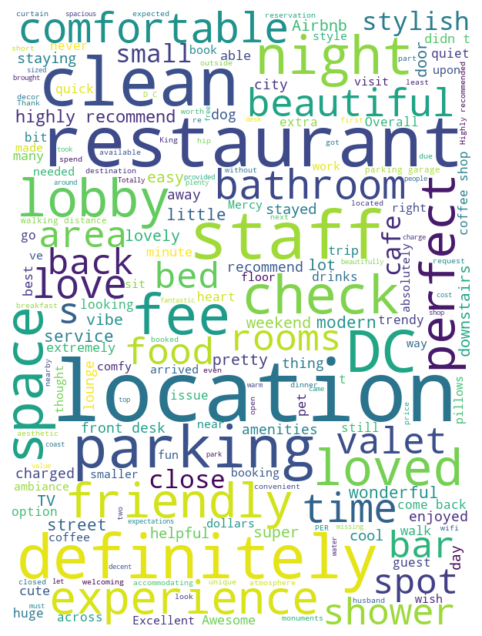

<Figure size 640x480 with 0 Axes>

In [80]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set up word cloud parameters
stopwords = set(STOPWORDS)  # You can add more stopwords here if you want

# Add additional stopwords
stopwords.update(['everything','said', 'really', 'much', 'also','great','will','well','place', 'stay',
                  'host', 'apartment', 'room', 'us', 'home', 'one', 'would','amazing', 'nice', 'Truly',
                  'hotel','room','stay', 'good'])

# Assuming 'comment' is the column with text data
text = " ".join(review for review in top_10_review.comments.dropna())


# Generate a word cloud image
wordcloud = WordCloud(
    width = 600,
    height =800,
    background_color ='white', 
    stopwords = stopwords, 
    contour_width = 1, 
    contour_color = 'steelblue'
).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

plt.savefig('wordcloud.png')